**PREDICTION WITH LOGISTIC REGRESSION + KNN + SVM + DTC**

---

**Exploratory Data Analysis (EDA)**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split,cross_validate, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, d2_log_loss_score
from sklearn.metrics import PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, precision_recall_curve, average_precision_score, RocCurveDisplay

plt.rcParams["figure.figsize"] = (10,6)
pd.options.display.float_format = '{:.3f}'.format

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [ ]:
df=pd.read_excel("/content/Raisin_Dataset.xlsx")

In [ ]:
df.shape

(900, 8)

In [ ]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,Kecimen
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,Kecimen
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,Kecimen
3,45928,286.541,208.760,0.685,47336,0.700,844.162,Kecimen
4,79408,352.191,290.828,0.564,81463,0.793,1073.251,Kecimen


In [ ]:
df.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
895,83248,430.077,247.839,0.817,85839,0.669,1129.072,Besni
896,87350,440.736,259.293,0.809,90899,0.636,1214.252,Besni
897,99657,431.707,298.837,0.722,106264,0.741,1292.828,Besni
898,93523,476.344,254.176,0.846,97653,0.659,1258.548,Besni
899,85609,512.082,215.272,0.907,89197,0.632,1272.862,Besni


**Missing Values**

In [ ]:
# Check out the missing values
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
Area,0,0.000
MajorAxisLength,0,0.000
MinorAxisLength,0,0.000
Eccentricity,0,0.000
ConvexArea,0,0.000
Extent,0,0.000
Perimeter,0,0.000
Class,0,0.000


**Duplicated Values**

In [ ]:
# Checks duplicates and drops them
def duplicate_values(df):
  print("Duplicate check...")
  num_duplicates = df.duplicated(subset=None, keep='first').sum()

  if num_duplicates > 0:
    print("There are", num_duplicates, "duplicated observations in the dataset.")
    df.drop_duplicates(keep='first', inplace=True)
    print(num_duplicates, "duplicates were dropped!")
    print("No more duplicate rows!")

  else:
    print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are no duplicated observations in the dataset.


**Basic Statistics**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.000,87804.128,39002.111,25387.000,59348.000,78902.000,105028.250,235047.000
MajorAxisLength,900.000,430.930,116.035,225.630,345.443,407.804,494.187,997.292
MinorAxisLength,900.000,254.488,49.989,143.711,219.111,247.848,279.889,492.275
Eccentricity,900.000,0.782,0.090,0.349,0.742,0.799,0.843,0.962
ConvexArea,900.000,91186.090,40769.290,26139.000,61513.250,81651.000,108375.750,278217.000
Extent,900.000,0.700,0.053,0.380,0.671,0.707,0.735,0.835
Perimeter,900.000,1165.907,273.764,619.074,966.411,1119.509,1308.390,2697.753


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


**Categorical Features**

In [ ]:
# Target Feature

df.Class.value_counts()

,count
Class,
Kecimen,450
Besni,450


**Numerical Features**

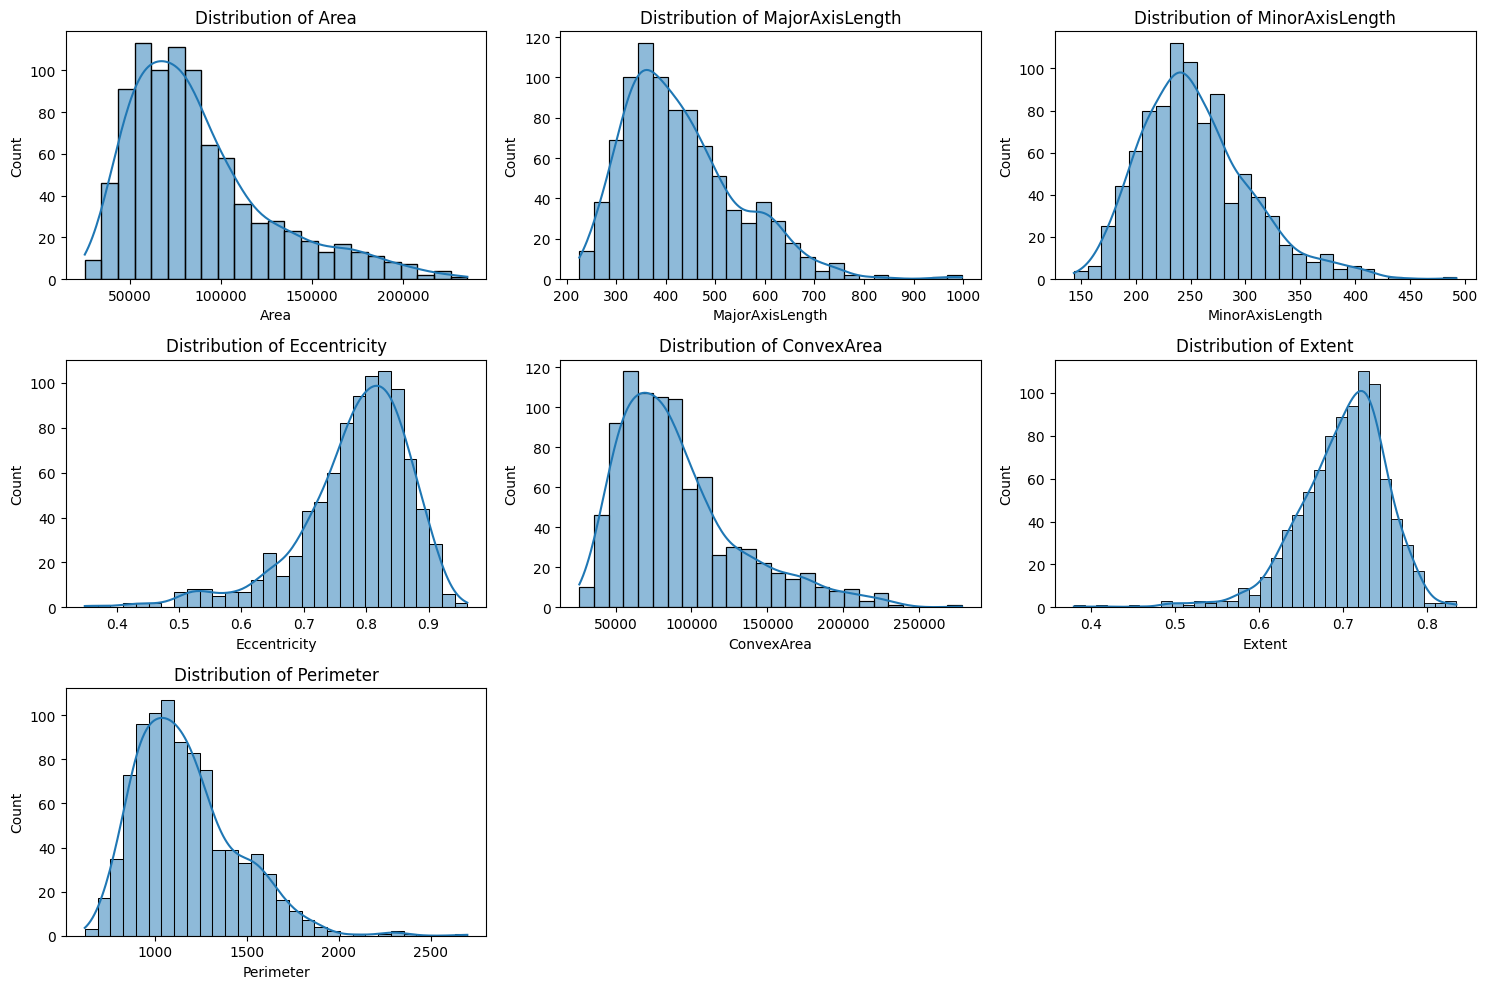

In [ ]:
numerical_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(15, 10))
num_vars = len(numerical_df.columns)
for i, var in enumerate(numerical_df.columns, 1):
 plt.subplot((num_vars // 3) + 1, 3, i)
 sns.histplot(data=df, x=var, kde=True)
 plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

**Feature Engineering**

Label the Target Feature

*   0: Besni
*   1: Kecimen

In [ ]:
labelencoder = LabelEncoder()
df["target"] = labelencoder.fit_transform(df["Class"])

In [ ]:
besni_count = df[df['target'] == 0].shape[0]
kecimen_count = df[df['target'] == 1].shape[0]
print(f"Besni (0) count: {besni_count}")
print(f"Keçimen (1) count: {kecimen_count}")

Besni (0) count: 450
Keçimen (1) count: 450


In [ ]:
print(df.shape)
df.sample(3)

(900, 9)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,target
143,50445,308.359,208.855,0.736,51555,0.723,851.632,Kecimen,1
798,71054,364.751,249.723,0.729,72956,0.728,1027.206,Besni,0
461,64391,449.556,187.122,0.909,68813,0.634,1177.714,Besni,0


In [ ]:
df.drop("Class", axis=1, inplace=True)

In [ ]:
print(df.shape)
df.head(3)

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,target
0,87524,442.246,253.291,0.820,90546,0.759,1184.040,1
1,75166,406.691,243.032,0.802,78789,0.684,1121.786,1
2,90856,442.267,266.328,0.798,93717,0.638,1208.575,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   target           900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


**Correlations**

<Axes: >

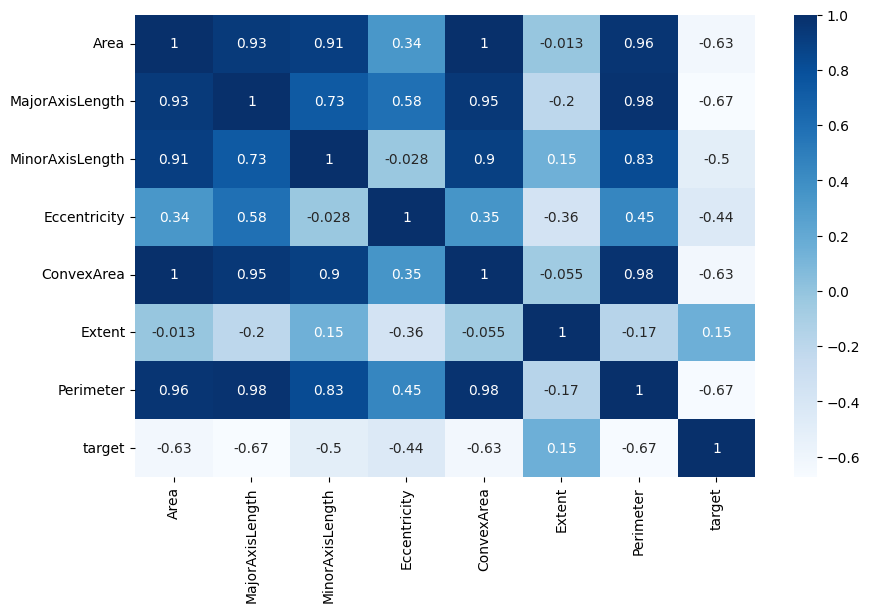

In [ ]:
# 0: Besni
# 1: Kecimen
sns.heatmap(df.corr(), cmap='Blues', annot= True)

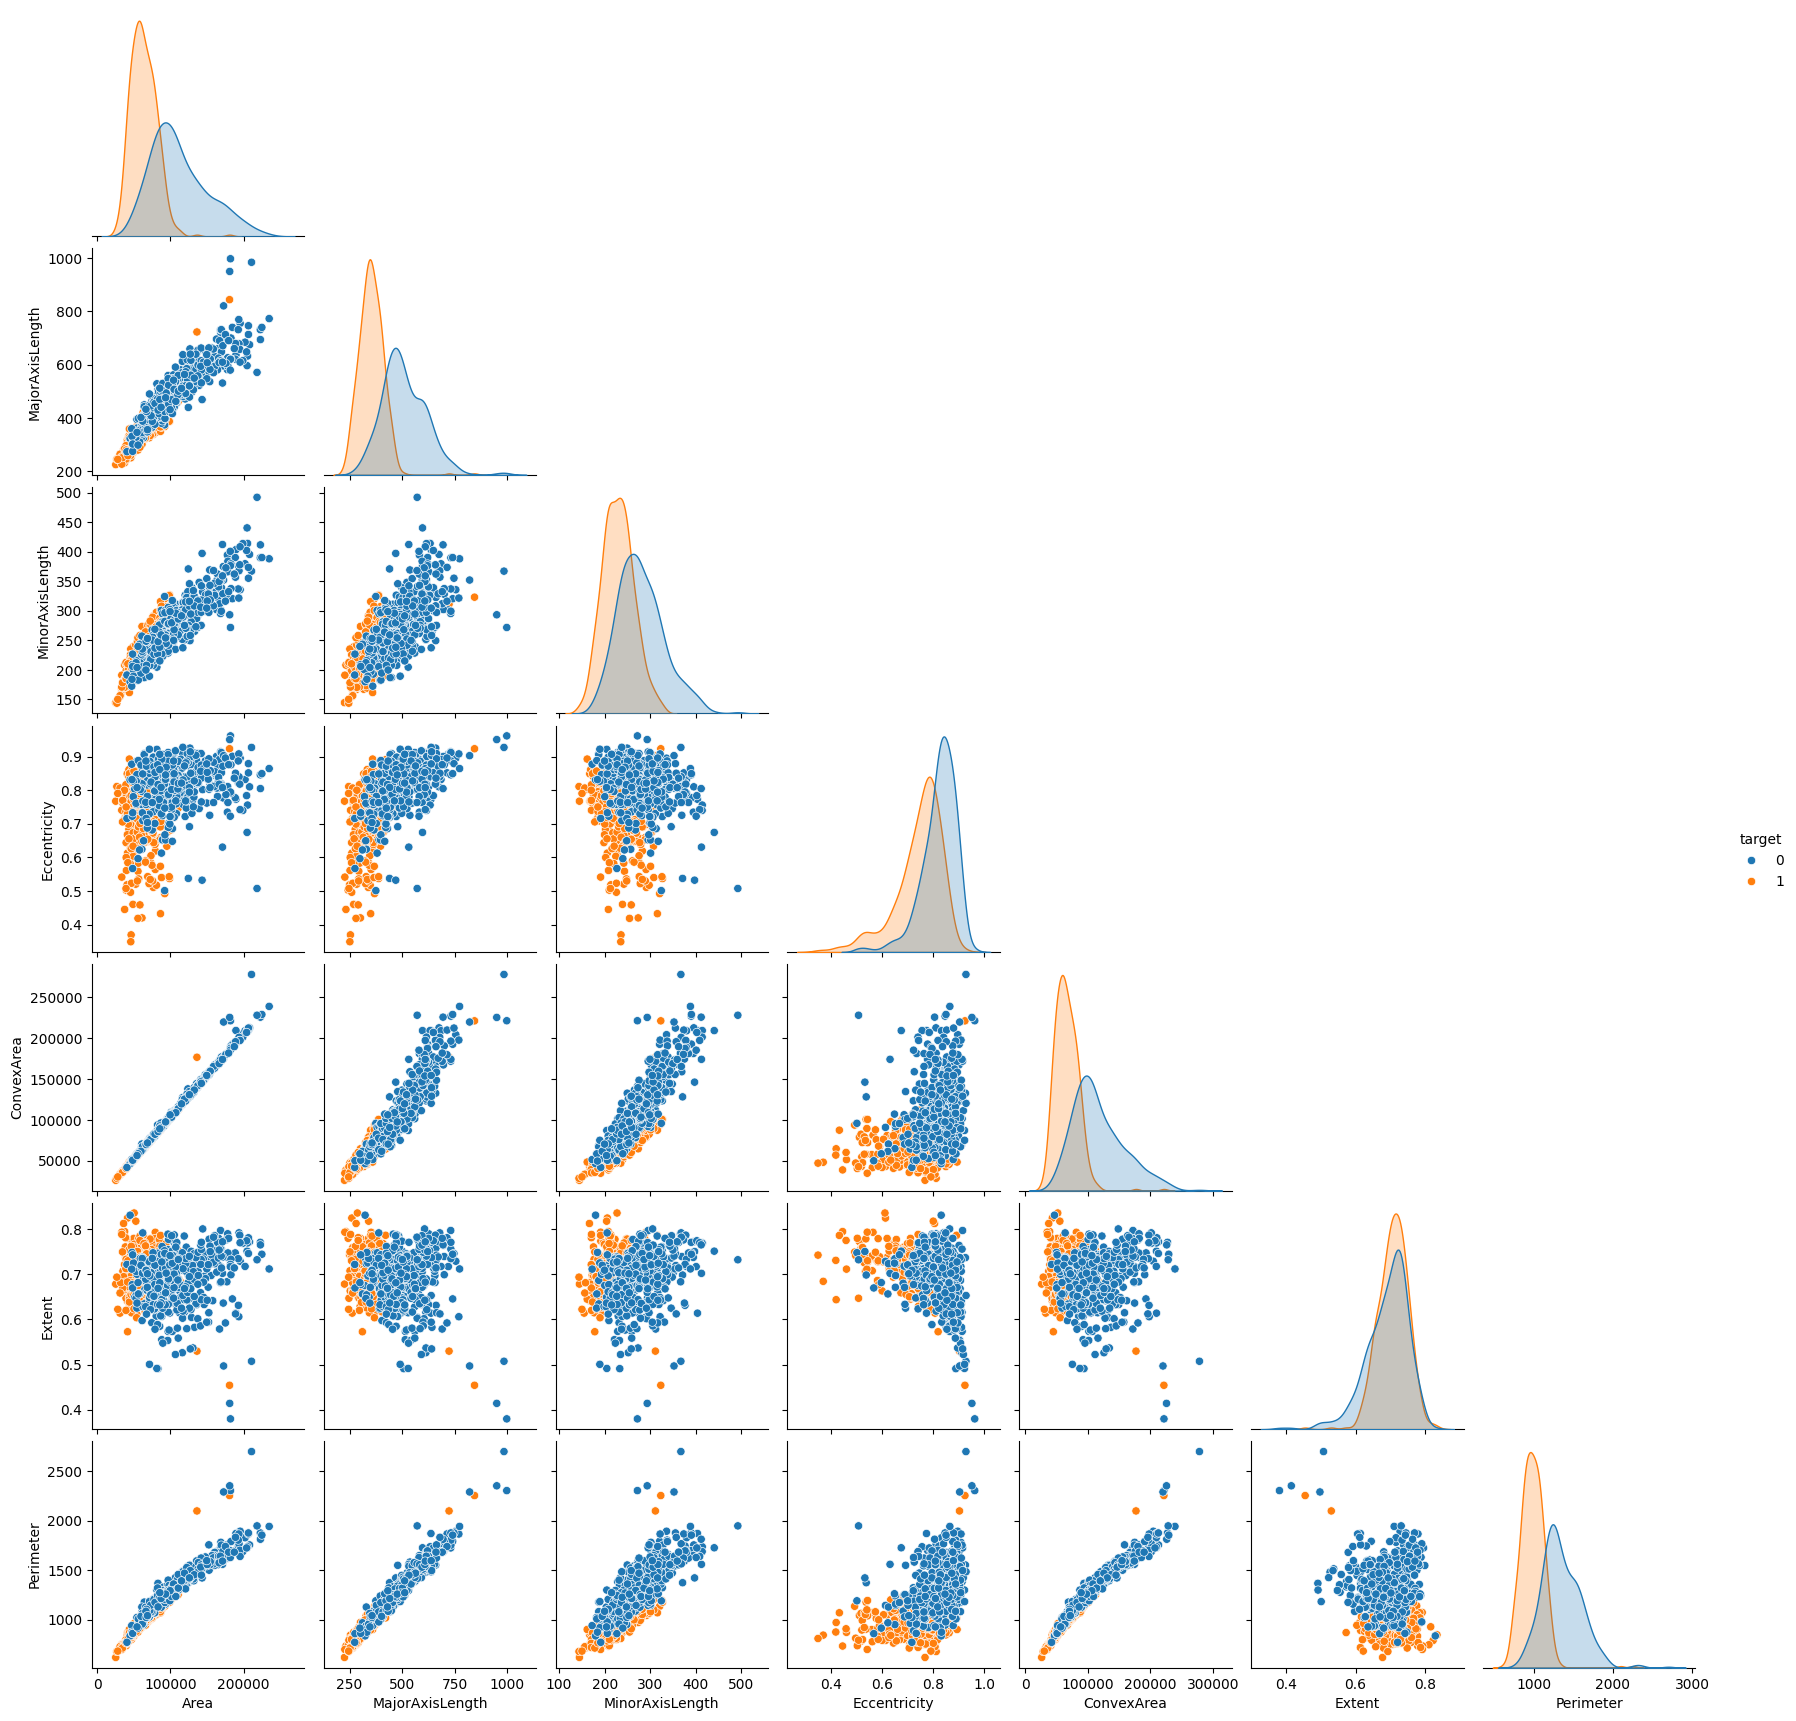

In [ ]:
# 0: Besni
# 1: Kecimen
sns.pairplot(data=df, corner=True, hue='target');

In [ ]:
corr = df.corr()['target'].sort_values(ascending=False)
corr

,target
target,1.000
Extent,0.155
Eccentricity,-0.438
MinorAxisLength,-0.503
ConvexArea,-0.626
Area,-0.626
Perimeter,-0.666
MajorAxisLength,-0.673


<Axes: >

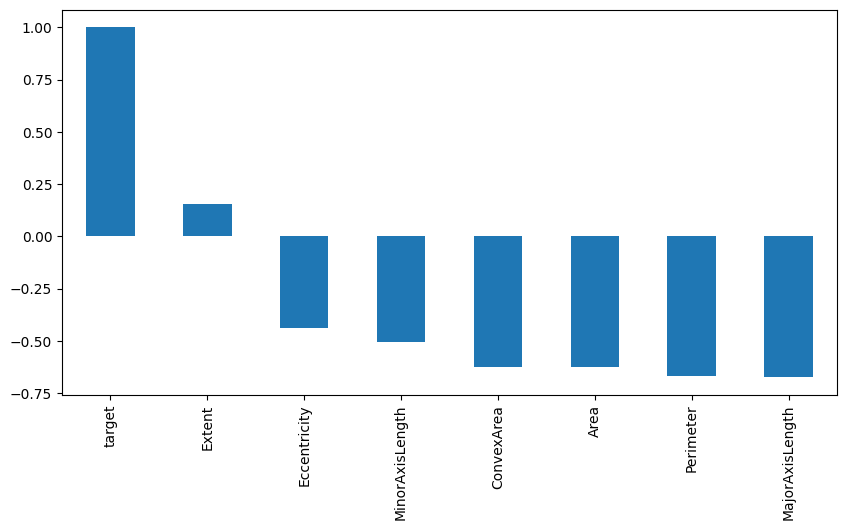

In [ ]:
# 0: Besni
# 1: Kecimen
corr.plot(kind='bar',figsize=(10,5))

In [ ]:
# Check Multicolinarty between features
def color_custom(val):
  if val > 0.90 and val < 0.99:
    color = 'red'
  elif val >= 1:
    color = 'blue'
  else:
    color = 'black'
  return f'color: {color}'
df.corr().style.map(color_custom)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,target
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352,-0.625715
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978,-0.673194
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417,-0.503102
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845,-0.438500
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612,-0.625567
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449,0.154689
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000,-0.665981
target,-0.625715,-0.673194,-0.503102,-0.438500,-0.625567,0.154689,-0.665981,1.000000


**Outlier Analysis**

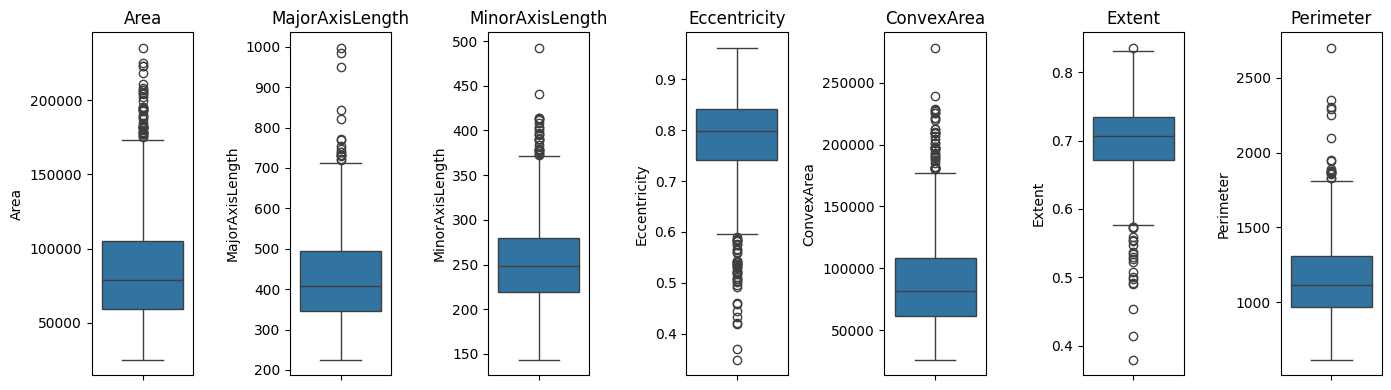

In [ ]:
# Checking Outliers in Individual Features
x = 0
#Numerical features;
numerical_columns = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
 'ConvexArea', 'Extent', 'Perimeter']

# Create a figure with specified size
plt.figure(figsize=(16, 4))
for col in numerical_columns:
 x += 1
 plt.subplot(1, 8, x)
 sns.boxplot(data=df[col])
 plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
#  0: Besni | 1: Kecimen
df.target.value_counts()

,count
target,
1,450
0,450


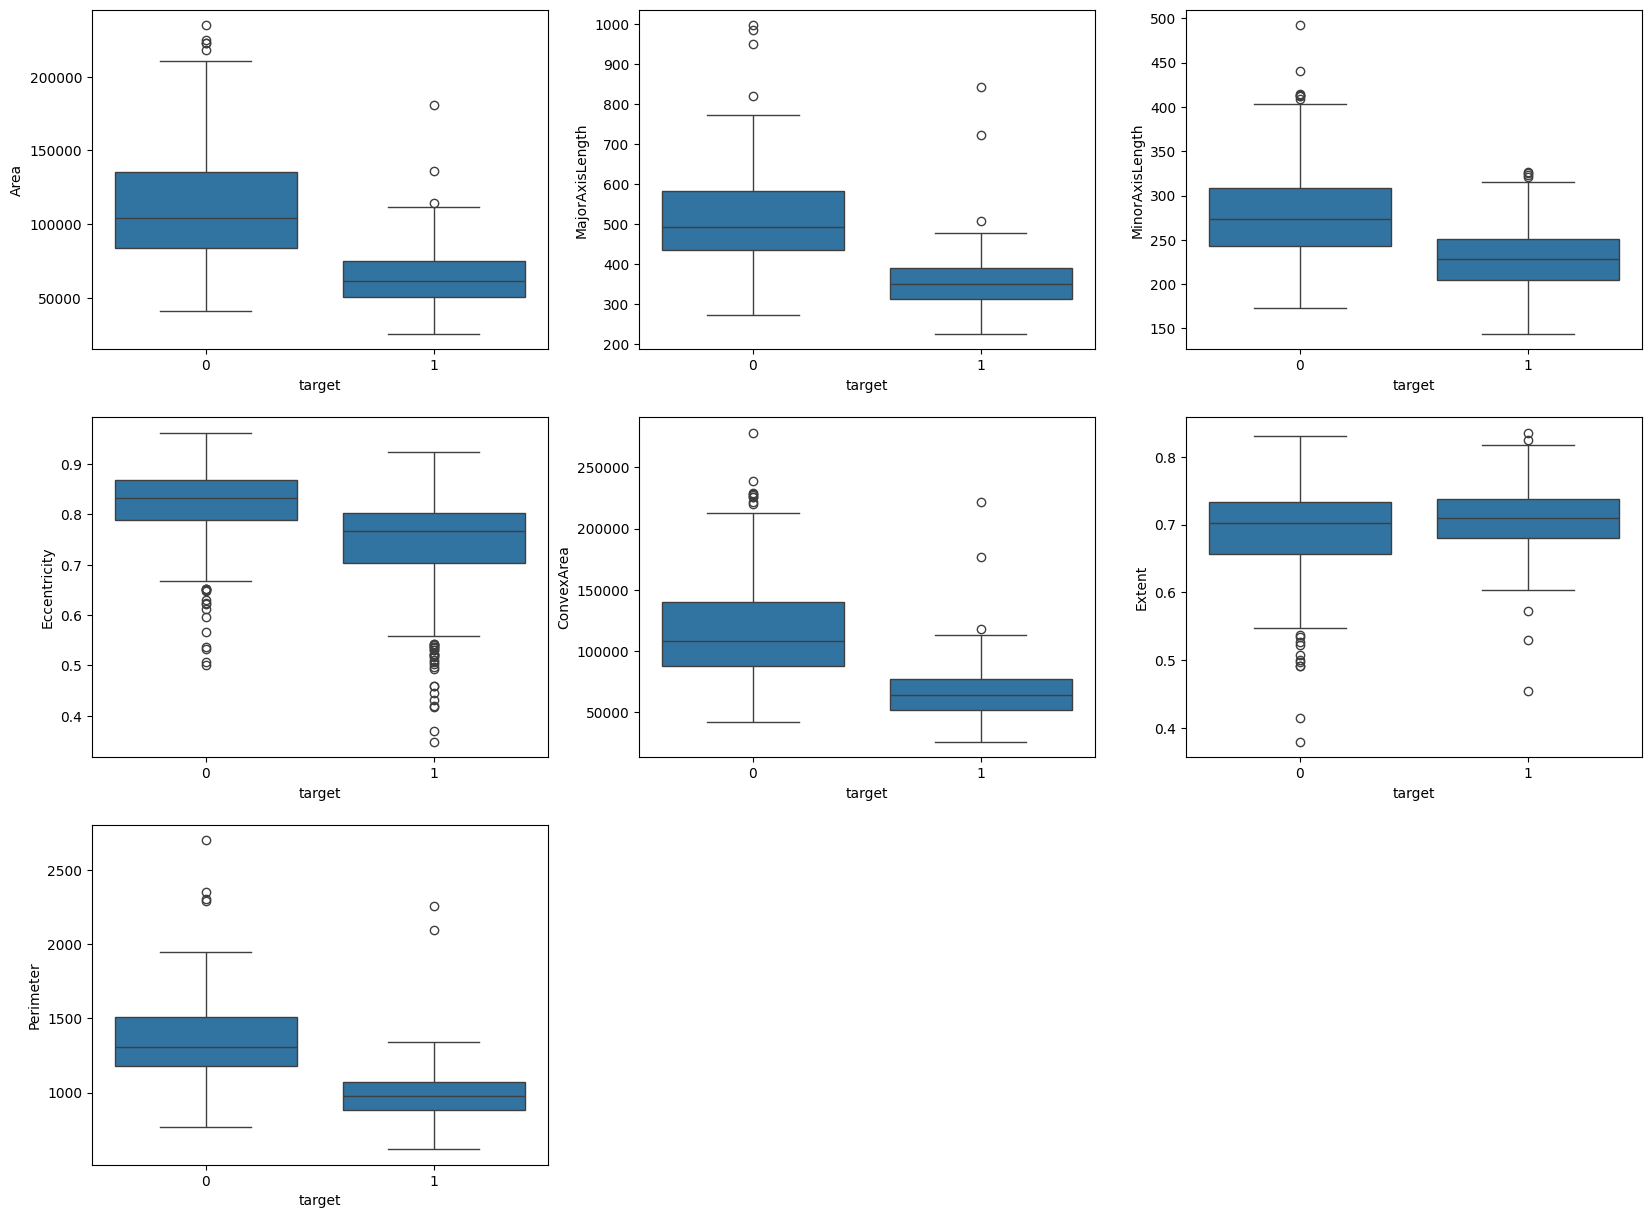

In [ ]:
# Checking Outliers by the Target; 0: Besni | 1: Kecimen
index = 0
plt.figure(figsize=(20,15))
for feature in df.columns:
  if feature != "target":
    index += 1
    plt.subplot(3,3,index)
    sns.boxplot(x='target',y=feature,data=df)
plt.show()

**Machine Learning Models**

**Splitting Train-Test**

In [ ]:
X= df.drop(columns="target")
y= df['target']

**Logistic Regression with Pipeline**

**Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Assuming 'X' and 'y' are defined as in your previous code snippets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data into training and testing sets

# Set the model and Scale in the Pipeline
logistic_model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression())])
logistic_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('logistic', LogisticRegression())])

In [ ]:
logistic_model["logistic"].coef_

array([[-2.73231059, -3.00045906, -1.14039964, -2.94996827, -2.77776287,
         1.35611952, -3.17203972]])

In [ ]:
logistic_model.named_steps['scaler'].get_feature_names_out()

array(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter'], dtype=object)

In [ ]:
logistic_model['logistic'].intercept_

array([4.660971])

**Prediction**

In [ ]:
y_pred = logistic_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1])

In [ ]:
y_pred_proba = logistic_model.predict_proba(X_test) #returns the probability estimates for each class label
y_pred_proba[:5,:]

array([[0.71288123, 0.28711877],
       [0.23522578, 0.76477422],
       [0.04239474, 0.95760526],
       [0.89453437, 0.10546563],
       [0.05261852, 0.94738148]])

In [ ]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,target
70,95347,451.526,280.226,0.784,99256,0.675,1255.245,1
827,61861,345.944,235.430,0.733,67390,0.702,1063.621,0
231,52693,283.504,242.114,0.520,54860,0.738,895.745,1
588,112808,542.505,267.202,0.870,116961,0.743,1390.400,0
39,49882,287.264,222.186,0.634,50880,0.766,843.764,1


In [ ]:
# Create new column for 'predicted' classes to compore with actual target classes
test_data["pred"] = y_pred
test_data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,target,pred
70,95347,451.526,280.226,0.784,99256,0.675,1255.245,1,0
827,61861,345.944,235.430,0.733,67390,0.702,1063.621,0,1
231,52693,283.504,242.114,0.520,54860,0.738,895.745,1,1
588,112808,542.505,267.202,0.870,116961,0.743,1390.400,0,0
39,49882,287.264,222.186,0.634,50880,0.766,843.764,1,1


In [ ]:
# Filtering incorrect predicted class labels of a data points in one df
wrong_pred = test_data[((test_data["target"] == 1) & (test_data["pred"] == 0)) |
 ((test_data["target"] == 0) & (test_data["pred"] == 1))]
print(wrong_pred.shape)
wrong_pred
# The model has predicted 26 observations incorrectly.

(26, 9)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,target,pred
70,95347,451.526,280.226,0.784,99256,0.675,1255.245,1,0
827,61861,345.944,235.430,0.733,67390,0.702,1063.621,0,1
731,84383,403.909,271.252,0.741,87629,0.675,1140.605,0,1
139,110616,461.145,306.899,0.746,112150,0.752,1252.875,1,0
168,92735,436.986,271.579,0.783,94693,0.704,1183.447,1,0
67,89235,443.516,258.947,0.812,91201,0.655,1179.694,1,0
688,57999,311.022,243.476,0.622,61519,0.656,968.697,0,1
30,88745,429.770,265.690,0.786,90715,0.752,1162.877,1,0
298,105020,440.390,306.105,0.719,107423,0.715,1228.366,1,0
744,53077,327.288,212.231,0.761,55532,0.646,934.708,0,1


In [ ]:
log_y_pred = logistic_model.predict(X_test)
LR = accuracy_score(y_test, log_y_pred)
LR

0.8555555555555555

**Model Performance**

In [ ]:
# Function to Evaluate the Model Performans using Classification Confusion_matrix()
def eval_metric(model, X_train, y_train, X_test, y_test):
 y_train_pred = model.predict(X_train)
 y_pred = model.predict(X_test)

 print("Test_Set")
 print(confusion_matrix(y_test, y_pred))
 print(classification_report(y_test, y_pred))
 print()
 print("Train_Set")
 print(confusion_matrix(y_train, y_train_pred))
 print(classification_report(y_train, y_train_pred))

In [ ]:
# Evaluating the Model Performance using Classification Metrics
log_scores = eval_metric(logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[74 12]
 [14 80]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        86
           1       0.87      0.85      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180


Train_Set
[[303  61]
 [ 37 319]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       364
           1       0.84      0.90      0.87       356

    accuracy                           0.86       720
   macro avg       0.87      0.86      0.86       720
weighted avg       0.87      0.86      0.86       720



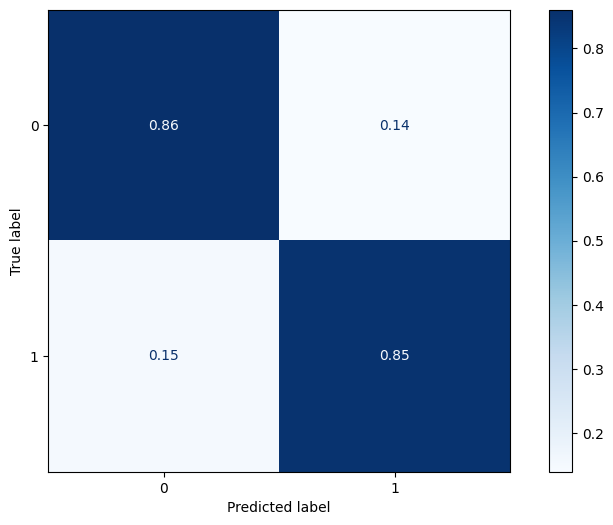

In [ ]:
ConfusionMatrixDisplay.from_estimator(logistic_model, X_test,y_test, normalize='true', cmap='Blues' )

**Model Validation**

In [ ]:
operations = [("scaler", MinMaxScaler()), ("logistic", LogisticRegression())]
model = Pipeline(steps=operations)
scores = cross_validate(model,
 X_train,
y_train,
scoring=['accuracy', 'precision', 'recall', 'f1'],
 cv=5, # 5-folded
 return_train_score=True)
df_scores = pd.DataFrame(scores, index=range(1, 6)) # CV has 5 iteration.
df_scores

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1
1,0.017,0.018,0.868,0.865,0.853,0.841,0.889,0.894,0.871,0.867
2,0.015,0.020,0.882,0.863,0.875,0.837,0.887,0.898,0.881,0.866
3,0.013,0.017,0.868,0.863,0.833,0.841,0.915,0.891,0.872,0.865
4,0.012,0.019,0.799,0.885,0.769,0.857,0.845,0.923,0.805,0.889
5,0.014,0.019,0.903,0.854,0.861,0.834,0.958,0.881,0.907,0.857


In [ ]:
df_scores.mean()[2:]

,0
test_accuracy,0.864
train_accuracy,0.866
test_precision,0.838
train_precision,0.842
test_recall,0.899
train_recall,0.897
test_f1,0.867
train_f1,0.869


**Hyperparameter Optimization**

In [ ]:
logistic_model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'logistic': LogisticRegression(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'deprecated',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [ ]:
# Hyperparameters Tuning with GridSearchSV
# Define the pipeline steps
model = Pipeline([("scaler", MinMaxScaler()), ("logistic", LogisticRegression())])
# Define hyperparameters for tuning
penalty = ["l1", "l2"] # Regularization terms: l1 (Lasso) and l2 (Ridge)
C = np.logspace(-1, 5, 20) # Regularization strength; inverse of regularization parameter
solver = ["lbfgs", "liblinear", "sag", "saga"] # Optimization algorithms
# Create the parameter grid
param_grid = {"logistic__penalty" : penalty,
 "logistic__C" : C,
 "logistic__solver":solver}
grid_model = GridSearchCV(estimator=model,
 param_grid=param_grid,
cv=5,
scoring = "accuracy",
 n_jobs = -1, # Use all available cores
 return_train_score=True) # Return training scores

In [ ]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='accuracy')

In [ ]:
grid_model.best_params_

{'logistic__C': 1.8329807108324356,
 'logistic__penalty': 'l2',
 'logistic__solver': 'liblinear'}

In [ ]:
grid_model.best_score_

0.8694444444444445

**Prediction with Grid_Model**

In [ ]:
# Prediction with Test Data
y_pred = grid_model.predict(X_test)
y_pred_proba = grid_model.predict_proba(X_test)

In [ ]:
# Prediction with Train Data
y_train_pred = grid_model.predict(X_train)
y_train_pred_proba = grid_model.predict_proba(X_train)

In [ ]:
average_precision_score(y_train, y_train_pred_proba[:,1]) # Accuracy score for balanced data

0.9044538542126601

In [ ]:
grid_y_pred = grid_model.predict(X_test)
GLR = accuracy_score(y_test, grid_y_pred)
GLR


0.8722222222222222

**Evaluating the Model Performance**

In [ ]:
# Evaluating the Model Performance using Classification Metrics
grid_scores = eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[76 10]
 [13 81]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        86
           1       0.89      0.86      0.88        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180


Train_Set
[[307  57]
 [ 38 318]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       364
           1       0.85      0.89      0.87       356

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720



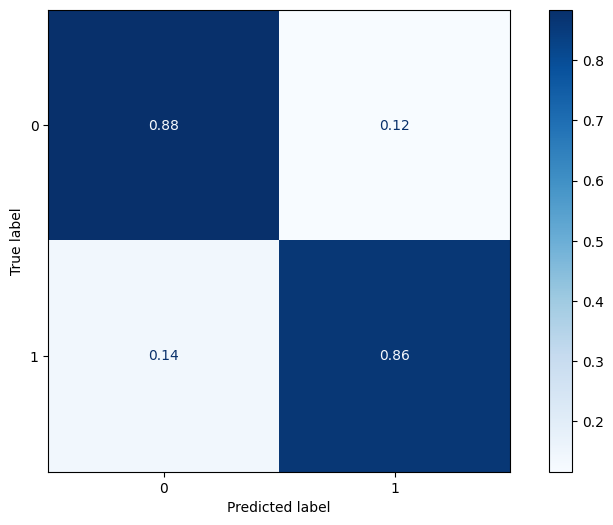

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_model, X_test,y_test, normalize='true', cmap='Blues' )

**ROC (Receiver Operating Curve) & AUC (Area Under Curve)**

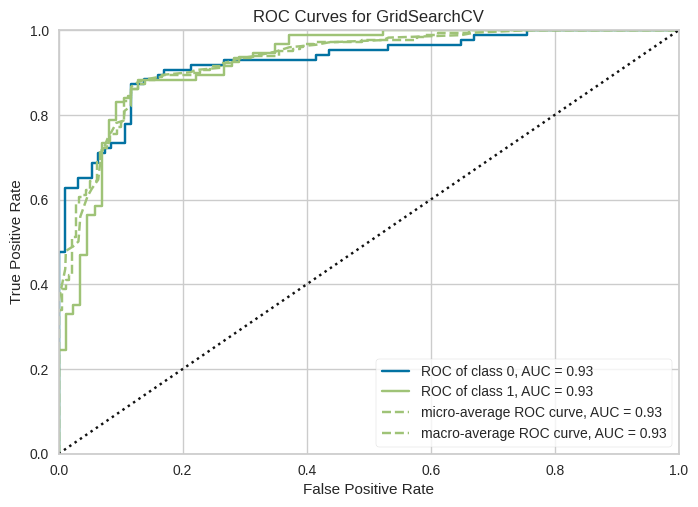

In [ ]:
#Finding Best Thresholds
from yellowbrick.classifier import ROCAUC
model = grid_model
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
visualizer.show();

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:, 1])
dict = {
 "precisions": precisions[:-1],
 "recalls": recalls[:-1],
 "threshold": thresholds
}
df_metric = pd.DataFrame(dict).sort_values(by=["recalls", "precisions"],
 ascending=False)
df_metric.head(12)

,precisions,recalls,threshold
2,0.496,1.000,0.000
1,0.495,1.000,0.000
0,0.494,1.000,0.000
8,0.499,0.997,0.001
7,0.498,0.997,0.001
6,0.497,0.997,0.001
5,0.497,0.997,0.001
4,0.496,0.997,0.000
3,0.495,0.997,0.000
161,0.633,0.994,0.103


In [ ]:
optimal_threshold = 0.103
predict_proba = grid_model.predict_proba(X_train)[:,1]
prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba]
print(confusion_matrix(y_train, prediction))
print(classification_report(y_train, prediction))

[[159 205]
 [  2 354]]
              precision    recall  f1-score   support

           0       0.99      0.44      0.61       364
           1       0.63      0.99      0.77       356

    accuracy                           0.71       720
   macro avg       0.81      0.72      0.69       720
weighted avg       0.81      0.71      0.69       720



In [ ]:
# Prediction on test data with optimal threshold;
def pred_bestTreshold(model, X_test, optimal_threshold = 0.103):
 predict_proba = model.predict_proba(X_test)
 prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba[:,1]]
 return prediction

In [ ]:
predictions = pred_bestTreshold(grid_model, X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[34 52]
 [ 0 94]]
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        86
           1       0.64      1.00      0.78        94

    accuracy                           0.71       180
   macro avg       0.82      0.70      0.68       180
weighted avg       0.81      0.71      0.68       180



**Support Vector Machine**

In [ ]:
# creating an instance of SVM class
svm_model = SVC()
svm_model.fit(X_train, y_train)
# maing predictions
svm_y_pred = svm_model.predict(X_test)
# checking score
SVM = accuracy_score(y_test, svm_y_pred)
SVM
# printing Classification Report
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        86
           1       0.83      0.90      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



**K-Nearest Neighbours**

In [ ]:
# building a function to test best neighbour
def KNN(k):
 # building a KNN model (default k=5)
 knn_model = KNeighborsClassifier(n_neighbors=k)
 # fitting the model to the training data
 knn_model.fit(X_train, y_train)
 # making predictions on the test set
 y_pred_knn = knn_model.predict(X_test)
 # evaluating the model's accuracy
 accuracy_knn = accuracy_score(y_test, y_pred_knn)
 return accuracy_knn

In [ ]:
# finding the best n value
k_values = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
best_accuracy = 0
best_k = None
for k in k_values:
  accuracy = KNN(k)
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_k = k
print("Best Accuracy: {0:0.5f} for K = {1}".format(best_accuracy, best_k))
KNN = best_accuracy
KNN

Best Accuracy: 0.85556 for K = 10


0.8555555555555555

**Decision Tree Classifier**

In [ ]:
#  Creating an instance of Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth = 10)
# Fitting the model to the training data
dt_model.fit(X_train, y_train)
# Making predictions
dt_y_pred = dt_model.predict(X_test)
# Checking accuracy
DTC = accuracy_score(y_test, dt_y_pred)
# Printing Classification Report
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80        86
           1       0.83      0.81      0.82        94

    accuracy                           0.81       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180



**Comparison of Models**

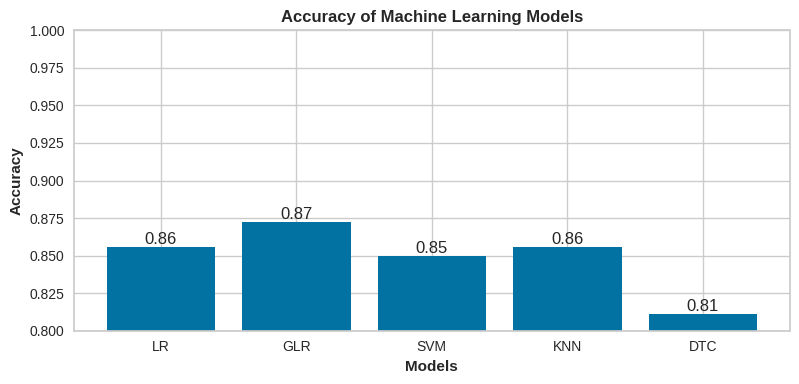

In [ ]:
# Accuracy dictionary
accuracy_dict = {"LR": LR, "GLR": GLR, "SVM": SVM, "KNN": KNN, "DTC": DTC}
# Plotting accuracy scores
plt.figure(figsize=(8,4))
bars = plt.bar(list(accuracy_dict.keys()), list(accuracy_dict.values()))
# Adding annotations
for bar in bars:
 height = bar.get_height()
 plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy of Machine Learning Models', fontweight='bold')
plt.tight_layout()
plt.ylim(0.8, 1)
plt.show()